# Laboratório 1: Detecção de veículos usando OpenCV

Bem vindo ao laboratório 1 do Mini curso de Visão Computacional, neste tutorial vamos aprender a como detectar veículos em imagens usando a biblioteca OpenCV. Inicie no mundo da deteção de objetos com o algoritmo Haar Cascade utilizando o OpenCV, uma poderosa biblioteca de visão computacional e processamento de imagem. 

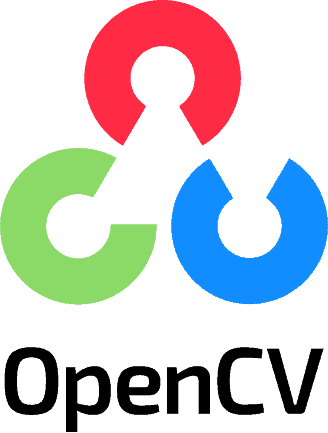


O OpenCV, que significa "Open Source Computer Vision Library" (Biblioteca de Visão Computacional de Código Aberto), é uma biblioteca de código aberto amplamente utilizada para processamento de imagens e visão computacional. Ela foi desenvolvida para fornecer um conjunto de ferramentas poderosas e eficientes que permitem a análise, manipulação e compreensão de imagens e vídeos em tempo real.

As principais características do OpenCV incluem:

- **Ampla gama de funcionalidades**: O OpenCV oferece uma ampla variedade de funções para tarefas como detecção de objetos, reconhecimento facial, rastreamento de movimento, calibração de câmera, correspondência de padrões, segmentação de imagem, e muito mais.

- **Suporte multiplataforma**: O OpenCV é uma biblioteca multiplataforma que funciona em sistemas Windows, macOS, Linux e até mesmo em dispositivos móveis, como Android e iOS.

- **Eficiência e otimização**: A biblioteca é altamente otimizada, o que a torna rápida e eficiente, especialmente para tarefas de visão computacional em tempo real.

- **Linguagens de programação**: Embora o OpenCV seja amplamente utilizado com a linguagem de programação C++, também oferece interfaces para linguagens como Python e Java, tornando-a acessível a uma ampla gama de desenvolvedores.

- **Comunidade ativa**: O OpenCV possui uma comunidade de desenvolvedores ativa e uma grande base de usuários, o que significa que você pode encontrar suporte, documentação e recursos on-line facilmente.

- **Licença de código aberto**: O OpenCV é distribuído sob a licença BSD, o que significa que é de uso gratuito e pode ser incorporado em projetos comerciais ou de código aberto sem restrições significativas.


O OpenCV desempenha um papel fundamental no avanço da visão computacional e é usado em uma variedade de aplicações, como veículos autônomos, reconhecimento de gestos, robótica, monitoramento de segurança, análise médica, entre muitos outros campos.



## O algoritmo Haar Cascade

O algoritmo Haar Cascade é uma técnica de detecção de objetos amplamente utilizada em visão computacional para identificar objetos específicos em imagens ou fluxos de vídeo. Ele é notável por sua eficiência e capacidade de detecção rápida, tornando-o adequado para aplicações em tempo real. O nome "Haar Cascade" é derivado dos filtros Haar usados na técnica.

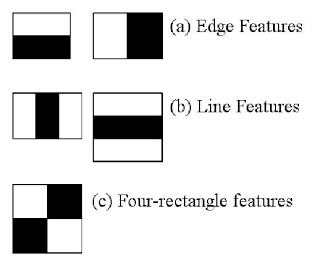 

A detecção de objetos por Haar Cascade é frequentemente usada em aplicações como reconhecimento facial, detecção de veículos, identificação de objetos em imagens médicas, entre outros. Aqui estão alguns pontos-chave sobre como o algoritmo funciona:

- **Classificadores em cascata**: A detecção de objetos Haar Cascade envolve o uso de classificadores em cascata. Um classificador em cascata é composto por várias etapas, cada uma das quais é responsável por uma tarefa específica na detecção do objeto. Cada etapa, ou estágio, é um classificador fraco que determina se uma parte da imagem corresponde ao objeto de interesse.

- **Características de Haar**: As características de Haar são padrões retangulares que são usados para descrever as propriedades locais da imagem. Essas características são calculadas em áreas retangulares adjacentes na imagem e são usadas para distinguir entre objetos e não objetos. As características de Haar podem representar bordas, linhas, texturas e outras informações visuais.

- **Treinamento do classificador**: O processo de criação de um classificador Haar Cascade envolve o treinamento com um grande conjunto de imagens positivas (imagens que contêm o objeto-alvo) e negativas (imagens que não contêm o objeto-alvo). O classificador é treinado para aprender as características distintivas do objeto a ser detectado.

- **Cascata de estágios**: A ideia-chave por trás da eficiência do Haar Cascade é que a maioria das regiões da imagem não contém o objeto-alvo. Portanto, o algoritmo utiliza uma cascata de estágios, onde a maioria das regiões da imagem é rapidamente descartada nas primeiras etapas. Apenas as regiões que passam por todas as etapas são consideradas positivas e indicativas da presença do objeto.

- **Ajuste de parâmetros**: O desempenho do classificador pode ser ajustado por meio de parâmetros, como o número de estágios na cascata, o tamanho das características de Haar e o limiar de decisão. A otimização desses parâmetros é importante para equilibrar a sensibilidade e a especificidade da detecção.

## Bibliotecas
Para realizar este estudo, será necessário importar algumas bibliotecas essenciais que desempenharão papéis cruciais, como carregar a imagem, realizar pré-processamento e efetuar a detecção do objeto-alvo.

In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests  

/Users/ronaldlopes/opt/anaconda3/envs/ml/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Carregando e processando a imagem



In [2]:
def read_image_from_url(url):
    image = Image.open(requests.get(url, stream=True).raw)
    image = image.resize((450,250))
    image_arr = np.array(image)
    return image, image_arr

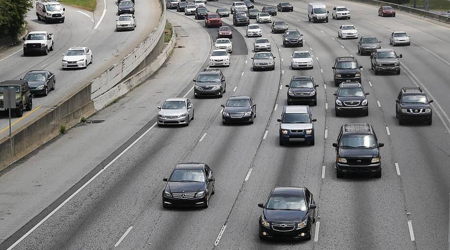

In [3]:
image, image_arr =  read_image_from_url('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg')

image



Para obter melhroes resultados, aplicaremos algumas transformações à imagem. Primeiramente, converteremos a imagem para escala de cinza, o que simplifica o processamento ao reduzir a imagem para uma única camada de intensidade de cor. Isso é crucial, uma vez que a detecção de objetos geralmente depende de diferenças de intensidade em vez de cor.

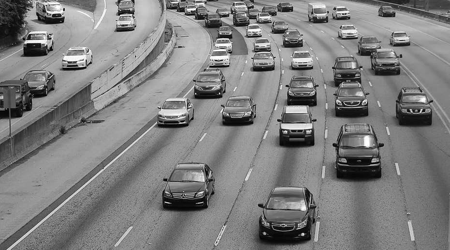

In [4]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

O próximo passo será utilizar uma técnica conhecida como "GaussianBlur" para reduzir o ruído na imagem. O desfoque gaussiano é uma técnica amplamente empregada em processamento de imagem e design gráfico, sendo eficaz na suavização da imagem e na eliminação de imperfeições, preparando-a para um processamento subsequente mais eficiente. 

Entretanto, vale ressaltar que, ao reduzir o ruído, também reduzimos alguns detalhes da imagem. Para aplicar essa técnica de pré-processamento, empregaremos a função GaussianBlur().

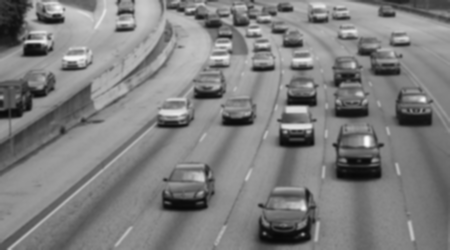

In [5]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Em seguida, realizaremos uma operação de dilatação na imagem. A dilatação é uma técnica morfológica que consiste em preencher os pixels com um elemento estruturado, também conhecido como kernel, a fim de preencher partes faltantes na imagem, sempre que necessário. 

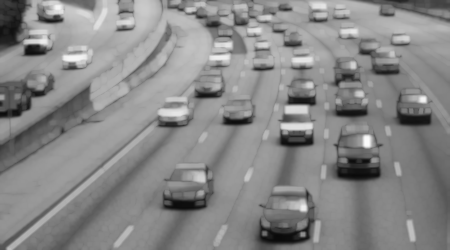

In [6]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

Por fim, executaremos uma transformação morfológica utilizando um kernel. A transformação morfológica com um kernel permite moldar, extrair ou realçar características específicas na imagem. Isso pode ser particularmente útil para destacar as partes relevantes dos objetos que estamos tentando detectar. A escolha do kernel e do tipo de operação morfológica depende da aplicação específica.

Usaremos a técnica morphologyEx, que indica à função em qual imagem devem ser aplicadas as operações de processamento de imagem, e o segundo argumento define quais operações devem ser realizadas. Dependendo da aplicação, você pode precisar de kernels com formatos elípticos ou circulares. Para implementar o método morphologyEx utilizando o OpenCV, recorreremos ao método getStructuringElement.

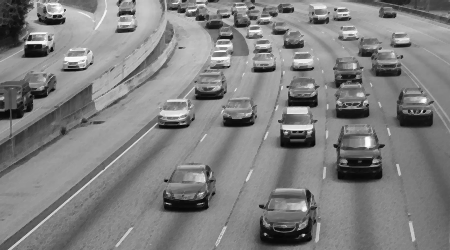

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(grey, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Cada um desses passos é uma etapa crítica para preparar a imagem para a detecção de objetos, permitindo que o algoritmo se concentre nas características importantes, ao mesmo tempo em que reduz o impacto do ruído e das imperfeições na imagem. 

## Realizando a detecção

Agora, para detectar carros, precisamos utilizar o modelo já treinado. Em seguida, especificamos o caminho para o arquivo do modelo, que será essencial para o processo de detecção.

Nesse cenário, vamos empregar a função "CascadeClassifier," que é uma função pré-definida no OpenCV, criada para treinar imagens a partir de um arquivo XML pré-treinado (cars.xml). Uma vez que desejamos detectar múltiplos objetos, ou seja, carros, vamos utilizar a função "detectMultiScale."

In [8]:
!wget https://raw.githubusercontent.com/RonaldLopes/minicurso-visao-computacional/main/car-detection/model/cars.xml

--2023-10-16 23:06:22--  https://raw.githubusercontent.com/RonaldLopes/minicurso-visao-computacional/main/car-detection/model/cars.xml
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 118803 (116K) [text/plain]
Salvando em: “cars.xml.1”

cars.xml.1          100%[===================>] 116,02K  --.-KB/s    em 0,04s   

2023-10-16 23:06:23 (2,89 MB/s) - “cars.xml.1” salvo [118803/118803]



In [9]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[376,   1,  24,  24],
       [252,  10,  22,  22],
       [214,  22,  24,  24],
       [241,  42,  43,  43],
       [303,   3,  30,  30],
       [363,  42,  48,  48],
       [ 51,  40,  45,  45],
       [ 10,  19,  52,  52],
       [ 39,   2,  32,  32],
       [149,  92,  52,  52],
       [183,  63,  51,  51],
       [100,   3,  44,  44],
       [208,  87,  57,  57],
       [268, 107,  58,  58],
       [261,  55,  73,  73],
       [242,  84,  92,  92],
       [319,  70,  65,  65],
       [274,  12,  50,  50],
       [386,  85,  58,  58],
       [318, 122,  81,  81],
       [141, 151,  84,  84]], dtype=int32)

21  cars found


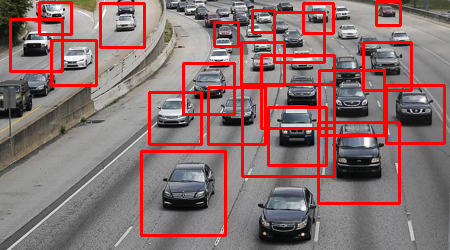

In [10]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

## Testando com outra imagem
Vamos testar agora esta técnica com outra imagem e acompanhar o resultado.

In [14]:
image, image_arr =  read_image_from_url('https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2021/01/720/405/us-highway-traffic.jpg?ve=1&tl=1')
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
dilated = cv2.dilate(blur,np.ones((3,3)))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(grey, cv2.MORPH_CLOSE, kernel) 
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

AttributeError: type object 'Image' has no attribute 'open'

A detecção de objetos com o Haar Cascade é rápida e eficaz, tornando-o uma escolha popular para muitas aplicações de visão computacional. No entanto, sua precisão pode ser influenciada pela qualidade dos dados de treinamento e pela escolha dos parâmetros. No geral, alguns pontos são importantes a se avaliar antes de escolher efetivamente o uso do Haar Cascade:

- Possui uma capacidade de detecção rápida e podem funcionar bem em tempo real.
- Não é tão preciso como as técnicas modernas de deteção de objectos.
- Prevê muitos falsos positivos, o que se torna uma grande desvantagem.
- Simples de implementar, requer menos potência de computação.

## Exemplo real
Para tornar mais interessante as coisas, vamos tentar utilizar um exemplo real, utilizando uma das cameras espelhadas pela cidade de Campos dos Goytacazes para monitorar o trânsito.

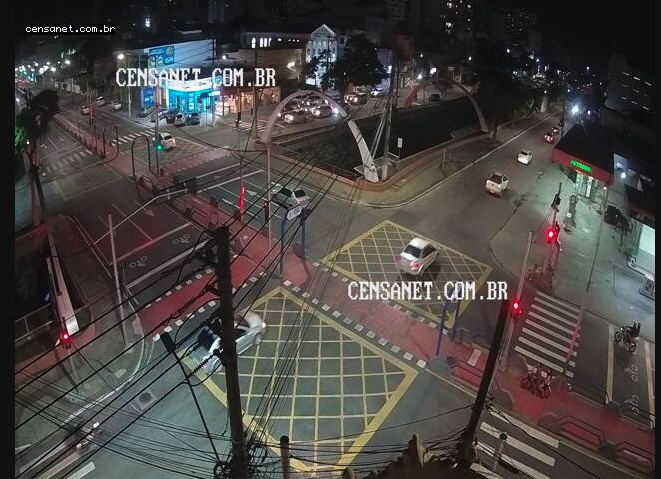


In [12]:
import requests
import pandas as pd
cameras = requests.get('https://www.censanet.com.br/cameras/json').json()
cameras = pd.DataFrame(cameras)
camera_28_marco = cameras[cameras['Nome']=='28 de Março']
camera_28_marco

,Idcamera,Monitor,Nome,Locais,Online,Manutencao,Qtdeviews,Imagem,Googlex,Googley,MonitorLow,Hash
8,15,29,28 de Março,Av. 28 de Março com Beira Valão,True,False,170637,28_marco.jpg,-21.7654,-41.329149,29,99f70eaf5054ba975ff68aef5f311f6a


4.6.0


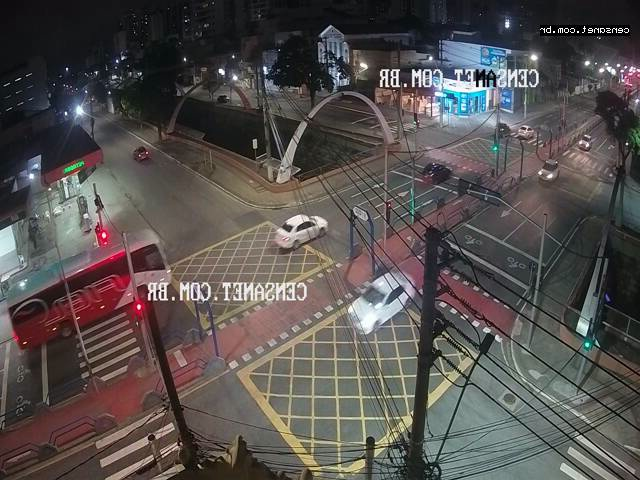

KeyboardInterrupt: 

In [13]:
import cv2
print(cv2.__version__)
import time
from IPython.display import display, Image
cascade_src = 'cars.xml'
video_src = 'https://cnetzm01.censanet.com.br/zm/cgi-bin/zms?mode=jpeg&monitor={}&auth={}'.format(camera_28_marco['MonitorLow'].values[0], camera_28_marco['Hash'].values[0])

display_handle=display(None, display_id=True)
cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
while True:
    ret, img = cap.read()
    if (type(img) == type(None)):
        break
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)      
    
#     cv2.imshow('video', img)
#     plt.imshow(img)
#     plt.show()
    frame = cv2.flip(img, 1) # if your camera reverses your image
    _, frame = cv2.imencode('.jpeg', frame)
    display_handle.update(Image(data=frame.tobytes()))
#     time.sleep(1)
    if cv2.waitKey(33) == 27:
        break

cv2.destroyAllWindows()

## Referencias

- https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
- https://www.analyticsvidhya.com/blog/2022/04/object-detection-using-haar-cascade-opencv/?utm_source=related_WP&utm_medium=https://www.analyticsvidhya.com/blog/2021/12/vehicle-detection-and-counting-system-using-opencv/
- https://www.analyticsvidhya.com/blog/2021/12/vehicle-detection-and-counting-system-using-opencv/
- https://github.com/opencv/opencv/tree/master/data/haarcascades